In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os
from yellowbrick.regressor import ResidualsPlot
from scipy.stats import norm

In [2]:
# PANDAS OPTIONS
pd.set_option('display.max_columns', None)

In [3]:
# IMPORTA DATASET
df = pd.read_csv('Gastos-Academia.csv')

In [4]:
# Dict com a tradução dos headers do dataset
headers_traduzidos = {
    'Período': 'periodo',
    'Gastos': 'gastos',
    'Consumo': 'consumo',
    'HS-MOD': 'horas',
    'N-Alunos': 'nalunos'
}

# Faz a tradução dos headers
df.rename(columns=headers_traduzidos, inplace=True)

In [5]:
df

,periodo,gastos,consumo,horas,nalunos
0,1,350,6,10,100
1,2,400,8,14,110
2,3,470,12,16,110
3,4,550,10,26,98
4,5,620,15,24,112
5,6,380,7,12,95
6,7,290,6,13,75
7,8,490,9,21,124
8,9,580,11,20,126
9,10,610,13,24,116


# MODELO 1

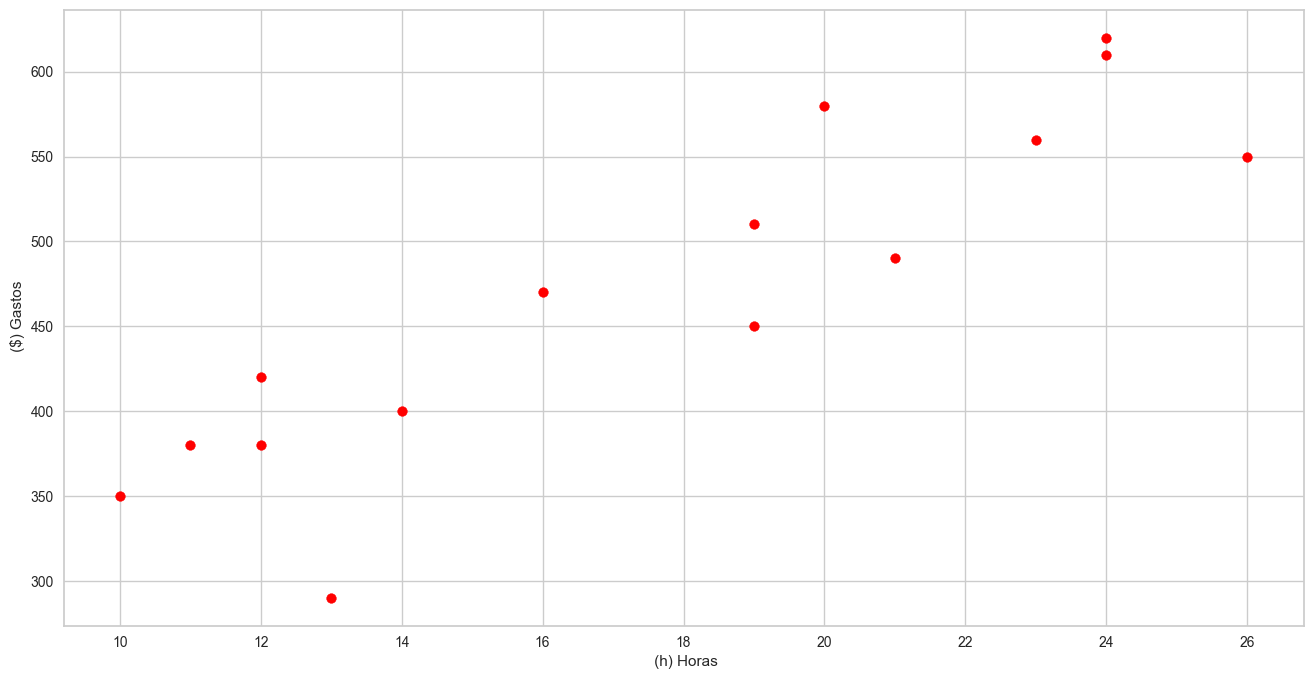

In [6]:
plt.figure(figsize = (16,8))
plt.scatter(
    df['horas'], 
    df['gastos'], 
    c='red')
plt.xlabel(" (h) Horas")
plt.ylabel(" ($) Gastos")
plt.show()

In [7]:
# Descobre modelo
X = df['horas'].values.reshape(-1,1)
y = df['gastos'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)


print("O modelo é:\n Gastos = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


O modelo é:
 Gastos = 176.58 + 16.71X


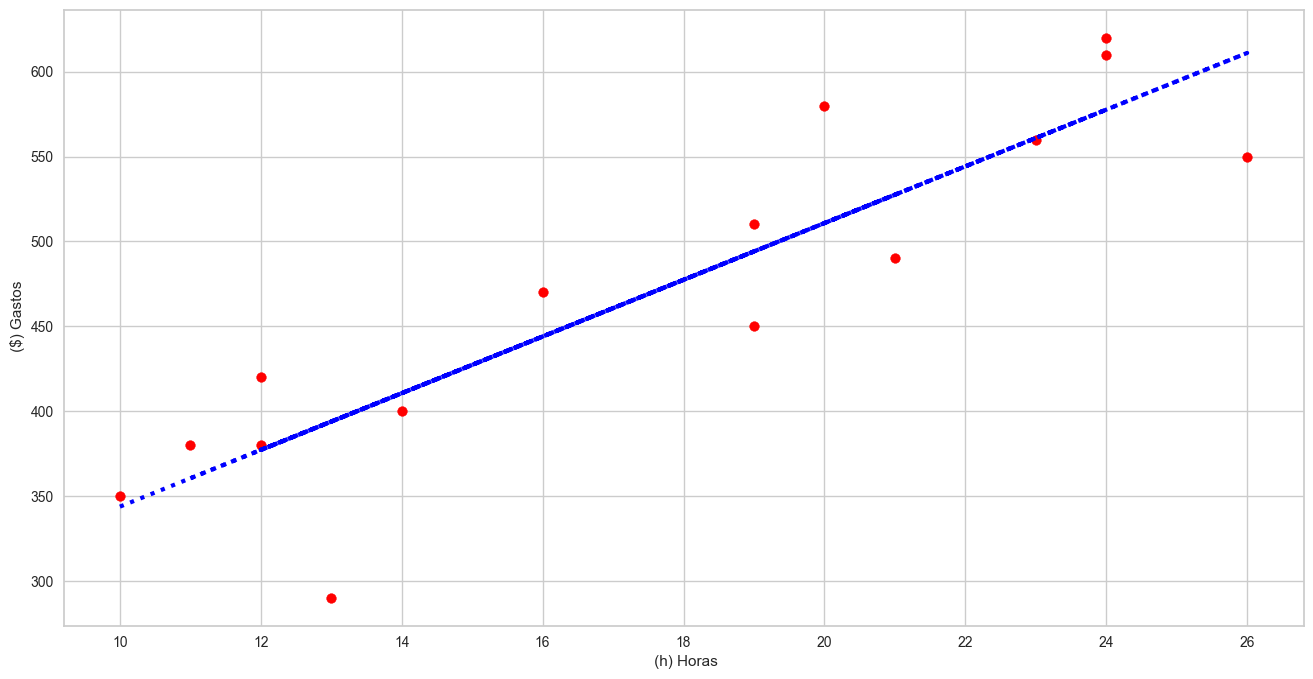

In [8]:
# Plota gráfico de previsibilidade
f_previsoes = reg.predict(X)


plt.figure(figsize = (16,8))
plt.scatter(
    df['horas'], 
    df['gastos'], 
    c='red')


plt.plot(
    df['horas'],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" (h) Horas")
plt.ylabel(" ($) Gastos")
plt.show()

In [9]:
X = df['horas']
y = df['gastos']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 gastos   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     50.86
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           7.68e-06
Time:                        00:19:50   Log-Likelihood:                -77.986
No. Observations:                  15   AIC:                             160.0
Df Residuals:                      13   BIC:                             161.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.5775     42.991      4.107      0.0

C:\Users\brenn\.virtualenvs\MQA-RNh3vqsr\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# MODELO 2

In [10]:
Xs = df[['horas','consumo']]
y = df['gastos'].values.reshape(-1,1)


reg = LinearRegression()
model_skt = reg.fit(Xs, y)


print("O modelo é: Gastos = {:.5} + {:.5}*consumo + {:.5}*horas".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]))

O modelo é: Gastos = 106.72 + 12.706*consumo + 13.579*horas


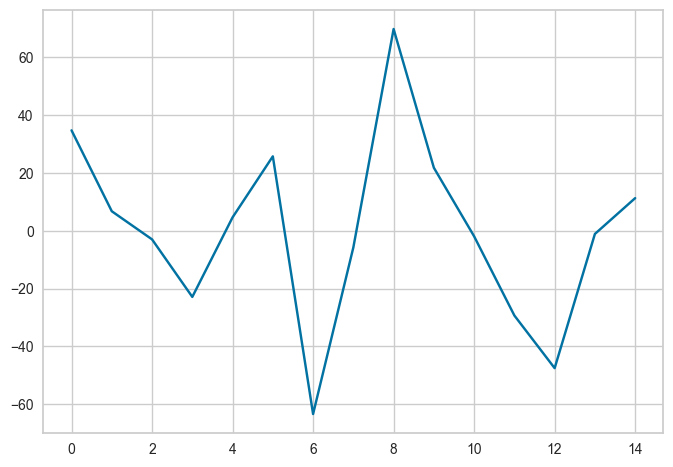

In [11]:
prediction = reg.predict(Xs)
df["residuals"] = (y - prediction)
std = np.std(df["residuals"]) 
mean = np.mean(df["residuals"])    
plt.plot(df["residuals"])

In [12]:
X = np.column_stack((df['consumo'], df['horas']))
y = df['gastos']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()


print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 gastos   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     50.18
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           1.48e-06
Time:                        00:19:51   Log-Likelihood:                -73.148
No. Observations:                  15   AIC:                             152.3
Df Residuals:                      12   BIC:                             154.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.7247     38.722      2.756      0.0

C:\Users\brenn\.virtualenvs\MQA-RNh3vqsr\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
